In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crime_data = pd.read_csv(r'C:\Users\Hp\Desktop\Crimes.csv')

In [3]:
crime_data.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11798117,JC397040,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46
5,11797877,JC396925,8/17/19 23:42,023XX N MILWAUKEE AVE,520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,True,False,1414,14,1.0,22
6,11797907,JC396922,8/17/19 23:42,061XX S DR MARTIN LUTHER KING JR DR,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,313,3,20.0,42
7,11798114,JC396931,8/17/19 23:40,011XX S CANAL ST,460,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,124,1,25.0,28
8,11797953,JC396974,8/17/19 23:39,014XX N NORTH PARK AVE,2170,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,SIDEWALK,True,False,1821,18,27.0,8
9,11797975,JC396957,8/17/19 23:33,044XX W 26TH ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,False,1013,10,22.0,30


In [8]:
crime_data['Day'] = pd.to_datetime(crime_data['Date']).dt.day
crime_data['Month'] = pd.to_datetime(crime_data['Date']).dt.month
crime_data['Year'] = pd.to_datetime(crime_data['Date']).dt.year
crime_data['Time'] = pd.to_datetime(crime_data['Date']).dt.time
crime_data['Day of week'] = pd.to_datetime(crime_data['Date']).dt.dayofweek
crime_data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Dates,Time,Day,Month,Year,Day of week
0,11798117,JC397040,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,2019-08-17,23:59:00,17,8,2019,5
1,11798223,JC397365,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,2019-08-17,23:59:00,17,8,2019,5
2,11797883,JC396936,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,2019-08-17,23:57:00,17,8,2019,5
3,11797909,JC397003,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,2019-08-17,23:55:00,17,8,2019,5
4,11797926,JC396947,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,2019-08-17,23:45:00,17,8,2019,5


In [9]:
crime_data['Primary Type'].unique()

array(['THEFT', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BATTERY',
       'ASSAULT', 'NARCOTICS', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'SEX OFFENSE', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'GAMBLING', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS', 'ARSON',
       'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'LIQUOR LAW VIOLATION',
       'HOMICIDE', 'STALKING', 'OBSCENITY', 'PROSTITUTION', 'KIDNAPPING',
       'INTIMIDATION', 'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL'], dtype=object)

In [11]:
crime_data['Primary Type'].value_counts()

THEFT                                38203
BATTERY                              31728
CRIMINAL DAMAGE                      16806
ASSAULT                              13219
OTHER OFFENSE                        10761
DECEPTIVE PRACTICE                   10630
NARCOTICS                             8767
BURGLARY                              5824
MOTOR VEHICLE THEFT                   5712
ROBBERY                               4903
CRIMINAL TRESPASS                     4298
WEAPONS VIOLATION                     4063
OFFENSE INVOLVING CHILDREN            1478
INTERFERENCE WITH PUBLIC OFFICER      1016
PUBLIC PEACE VIOLATION                1003
CRIM SEXUAL ASSAULT                    996
SEX OFFENSE                            771
PROSTITUTION                           455
HOMICIDE                               311
ARSON                                  222
LIQUOR LAW VIOLATION                   146
STALKING                               141
CONCEALED CARRY LICENSE VIOLATION      133
KIDNAPPING 

In [34]:
crime_data['Primary Type'].value_counts(normalize=True)[:15].mul(100).round(1)

THEFT                               23.6
BATTERY                             19.6
CRIMINAL DAMAGE                     10.4
ASSAULT                              8.2
OTHER OFFENSE                        6.6
DECEPTIVE PRACTICE                   6.6
NARCOTICS                            5.4
BURGLARY                             3.6
MOTOR VEHICLE THEFT                  3.5
ROBBERY                              3.0
CRIMINAL TRESPASS                    2.7
WEAPONS VIOLATION                    2.5
OFFENSE INVOLVING CHILDREN           0.9
INTERFERENCE WITH PUBLIC OFFICER     0.6
PUBLIC PEACE VIOLATION               0.6
Name: Primary Type, dtype: float64

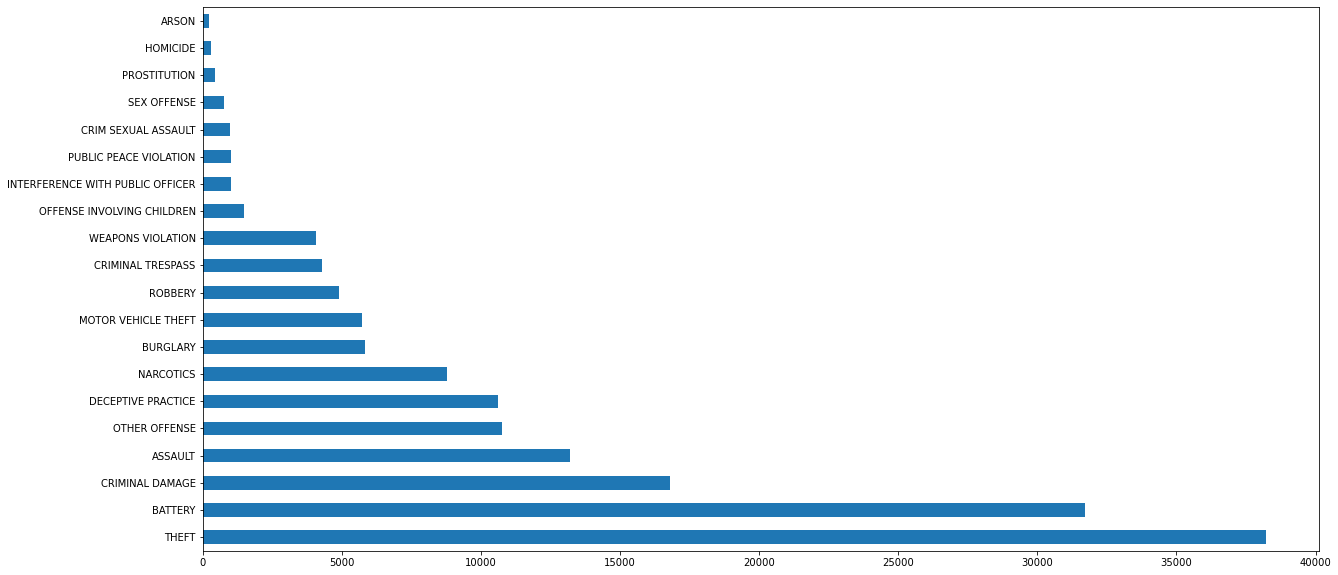

In [90]:
crime_data['Primary Type'].value_counts()[:20].plot(kind='barh',figsize=(20,10))

In [17]:
crime_data['Location Description'].unique()

array(['STREET', 'TAVERN/LIQUOR STORE', 'SIDEWALK', 'ALLEY',
       'COMMERCIAL / BUSINESS OFFICE', 'OTHER', 'CHA PARKING LOT/GROUNDS',
       'RESIDENCE', 'APARTMENT', 'GAS STATION',
       'RESIDENTIAL YARD (FRONT/BACK)', 'RESIDENCE-GARAGE',
       'RESIDENCE PORCH/HALLWAY', 'AIRPORT PARKING LOT', 'BOWLING ALLEY',
       'VEHICLE NON-COMMERCIAL', 'ATHLETIC CLUB', 'CTA STATION',
       'GROCERY FOOD STORE', 'PARK PROPERTY', 'BAR OR TAVERN',
       'CTA PLATFORM', 'RESTAURANT', 'LAKEFRONT/WATERFRONT/RIVERBANK',
       'POOL ROOM', 'DEPARTMENT STORE', 'PARKING LOT/GARAGE(NON.RESID.)',
       'CTA BUS STOP', 'CTA TRAIN', 'VACANT LOT/LAND',
       'SMALL RETAIL STORE', 'VEHICLE-COMMERCIAL', 'CONVENIENCE STORE',
       'OTHER RAILROAD PROP / TRAIN DEPOT', 'HOTEL/MOTEL',
       'VEHICLE - DELIVERY TRUCK', 'CONSTRUCTION SITE', 'AIRCRAFT',
       'CHA APARTMENT', 'CHA HALLWAY/STAIRWELL/ELEVATOR',
       'MEDICAL/DENTAL OFFICE', 'DRUG STORE', 'BANK',
       'CTA GARAGE / OTHER PROPERTY', nan, 

In [31]:
crime_data['Location Description'].value_counts(normalize=True)[:15].mul(100).round(1)

STREET                            22.2
RESIDENCE                         16.3
APARTMENT                         13.5
SIDEWALK                           7.8
OTHER                              4.0
PARKING LOT/GARAGE(NON.RESID.)     3.0
RESTAURANT                         2.8
SMALL RETAIL STORE                 2.6
ALLEY                              2.0
RESIDENTIAL YARD (FRONT/BACK)      1.9
DEPARTMENT STORE                   1.8
RESIDENCE PORCH/HALLWAY            1.8
VEHICLE NON-COMMERCIAL             1.8
GAS STATION                        1.5
GROCERY FOOD STORE                 1.3
Name: Location Description, dtype: float64

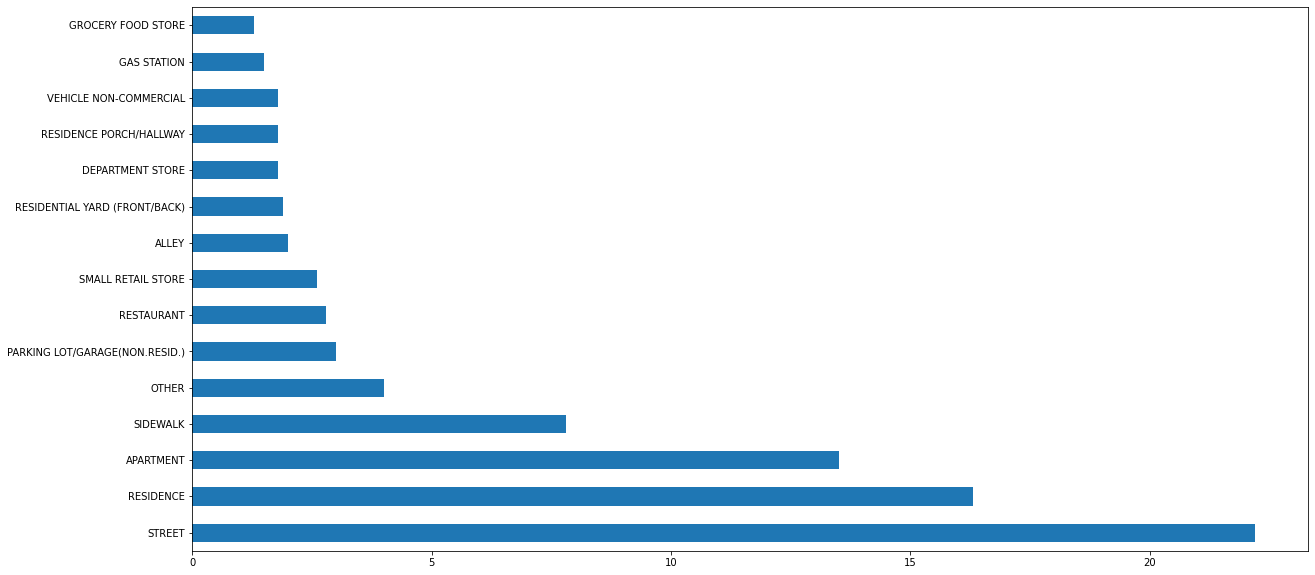

In [87]:
crime_data['Location Description'].value_counts(normalize=True)[:15].mul(100).round(1).plot(kind='barh',figsize=(20,10))

In [20]:
crime_data['Day of week'].value_counts()

4    24565
5    24223
3    23047
1    22909
2    22893
0    22599
6    21706
Name: Day of week, dtype: int64

In [28]:
 crime_data['Day of week'].value_counts(normalize=True).mul(100).round(1)   

4    15.2
5    15.0
3    14.2
1    14.1
2    14.1
0    14.0
6    13.4
Name: Day of week, dtype: float64

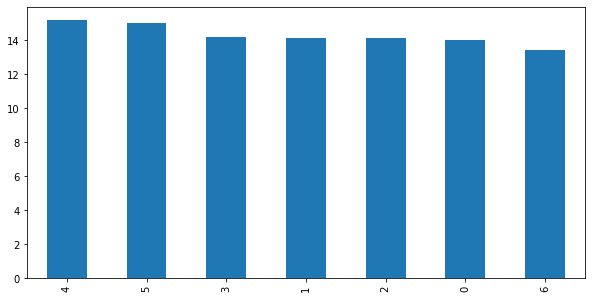

In [89]:
crime_data['Day of week'].value_counts(normalize=True).mul(100).round(1).plot(kind='bar',figsize=(10,5))

In [35]:
crime_data['Month'].value_counts(normalize=True).mul(100).round(1)  

7    15.0
5    14.4
6    14.2
4    12.8
3    12.4
1    11.9
2    11.2
8     8.0
Name: Month, dtype: float64

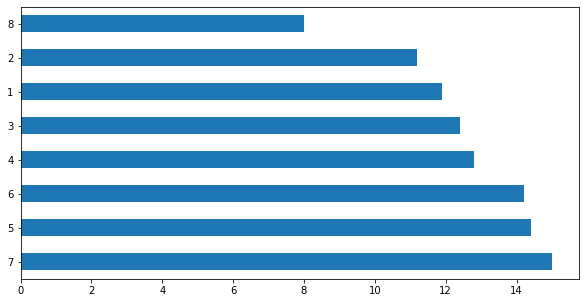

In [91]:
crime_data['Month'].value_counts(normalize=True).mul(100).round(1).plot(kind='barh',figsize=(10,5))

In [37]:
crime_data['IUCR'].unique()

array(['820', '1310', '143A', '460', '520', '041A', '2170', '313', '1320',
       '560', '910', '486', '860', '326', '810', '051A', '2820', '1581',
       '1822', '1811', '530', '496', '610', '890', '312', '141A', '870',
       '2093', '320', '484', '620', '2825', '281', '5002', '2900', '033A',
       '031A', '1661', '1755', '880', '420', '1305', '3731', '2014',
       '1360', '2020', '1020', '2024', '1345', '502R', '1220', '850',
       '2022', '1812', '554', '454', '1150', '430', '1242', '1330',
       '1365', '1570', '1210', '865', '337', '1710', '502P', '470',
       '4387', '440', '630', '2092', '1130', '497', '2017', '1121',
       '2027', '1152', '1156', '3730', '479', '1153', '2826', '5112',
       '051B', '1120', '930', '1154', '1790', '1478', '2210', '1780',
       '498', '1477', '5000', '650', '110', '495', '334', '325', '553',
       '462', '5111', '1821', '2850', '2018', '275', '3710', '584', '920',
       '2021', '1750', '1122', '1350', '2890', '1565', '1206', '1540',
   

In [38]:
crime_data['IUCR'].value_counts(normalize=True)[:15].mul(100).round(1)

486     9.3
820     8.5
460     6.5
560     5.5
810     5.4
1310    5.0
1320    4.7
890     4.2
860     4.1
910     3.1
610     2.1
143A    1.6
1330    1.6
1150    1.5
1153    1.4
Name: IUCR, dtype: float64

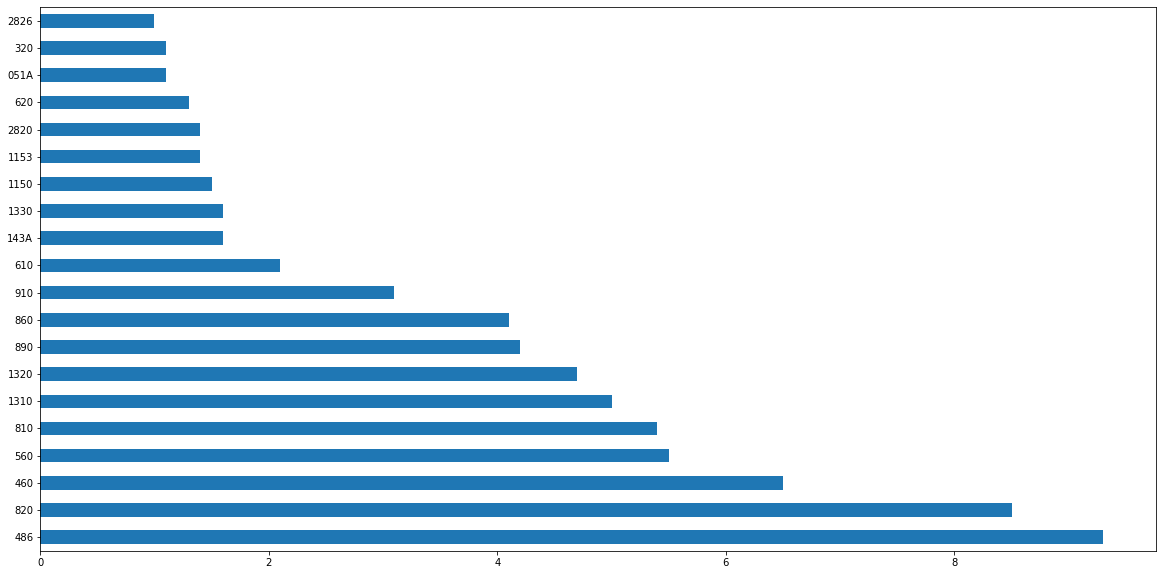

In [92]:
crime_data['IUCR'].value_counts(normalize=True)[:20].mul(100).round(1).plot(kind='barh',figsize=(20,10))

In [51]:
crime_data['block_add'] = crime_data['Block'].str.split(" ",n=1,expand=True)[0]

In [52]:
crime_data['block_add']

0         058XX
1         007XX
2         022XX
3         086XX
4         079XX
          ...  
161937    027XX
161938    013XX
161939    045XX
161940    045XX
161941    092XX
Name: block_add, Length: 161942, dtype: object

In [54]:
crime_data['block_add'].value_counts()[:15]

0000X    6290
001XX    4731
002XX    3770
003XX    3294
008XX    2959
006XX    2865
015XX    2847
007XX    2835
005XX    2777
014XX    2751
011XX    2719
012XX    2701
016XX    2698
013XX    2632
004XX    2538
Name: block_add, dtype: int64

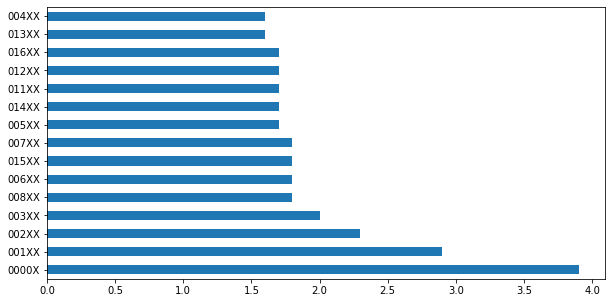

In [103]:
crime_data['block_add'].value_counts(normalize=True)[:15].mul(100).round(1).plot(kind='barh',figsize=(10,5))

In [56]:
crime_data['Arrest'].value_counts(normalize=True).mul(100).round(1)

False    78.8
True     21.2
Name: Arrest, dtype: float64

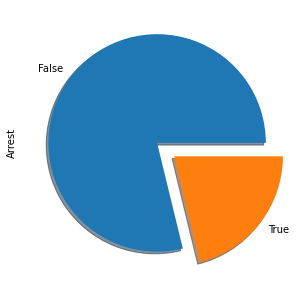

In [96]:
crime_data['Arrest'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',explode=(0,0.2),shadow=True,figsize=(10,5))

In [58]:
crime_data['Domestic'].value_counts(normalize=True).mul(100).round(1)

False    83.1
True     16.9
Name: Domestic, dtype: float64

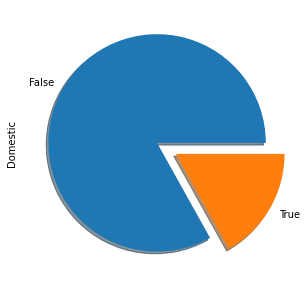

In [95]:
crime_data['Domestic'].value_counts(normalize=True).mul(100).round(1).plot(kind='pie',explode=(0,0.2),shadow=True,figsize=(10,5))

In [66]:
crime_data.groupby(['Primary Type','Arrest']).size()

Primary Type                       Arrest
ARSON                              False       205
                                   True         17
ASSAULT                            False     10798
                                   True       2421
BATTERY                            False     25270
                                   True       6458
BURGLARY                           False      5534
                                   True        290
CONCEALED CARRY LICENSE VIOLATION  False         4
                                   True        129
CRIM SEXUAL ASSAULT                False       945
                                   True         51
CRIMINAL DAMAGE                    False     15793
                                   True       1013
CRIMINAL TRESPASS                  False      1847
                                   True       2451
DECEPTIVE PRACTICE                 False     10156
                                   True        474
GAMBLING                           True 

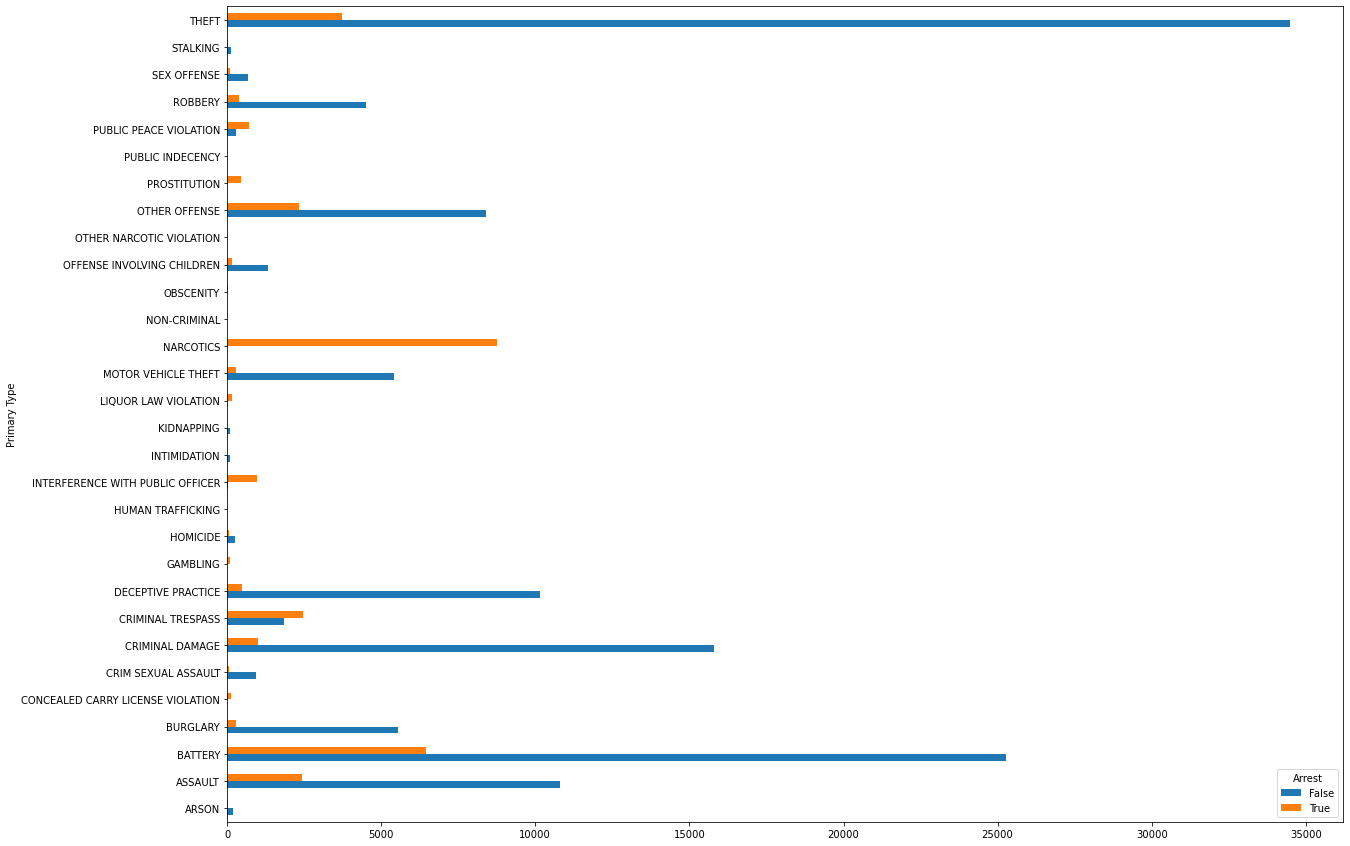

In [101]:
crime_data.groupby(['Primary Type','Arrest']).size().unstack('Arrest')[:30].plot.barh(figsize=(20,15))

In [82]:
crime_data.groupby(['Primary Type','Domestic']).size()

Primary Type                       Domestic
ARSON                              False         210
                                   True           12
ASSAULT                            False        9791
                                   True         3428
BATTERY                            False       16478
                                   True        15250
BURGLARY                           False        5724
                                   True          100
CONCEALED CARRY LICENSE VIOLATION  False         133
CRIM SEXUAL ASSAULT                False         845
                                   True          151
CRIMINAL DAMAGE                    False       14777
                                   True         2029
CRIMINAL TRESPASS                  False        4091
                                   True          207
DECEPTIVE PRACTICE                 False       10542
                                   True           88
GAMBLING                           False          92
HO

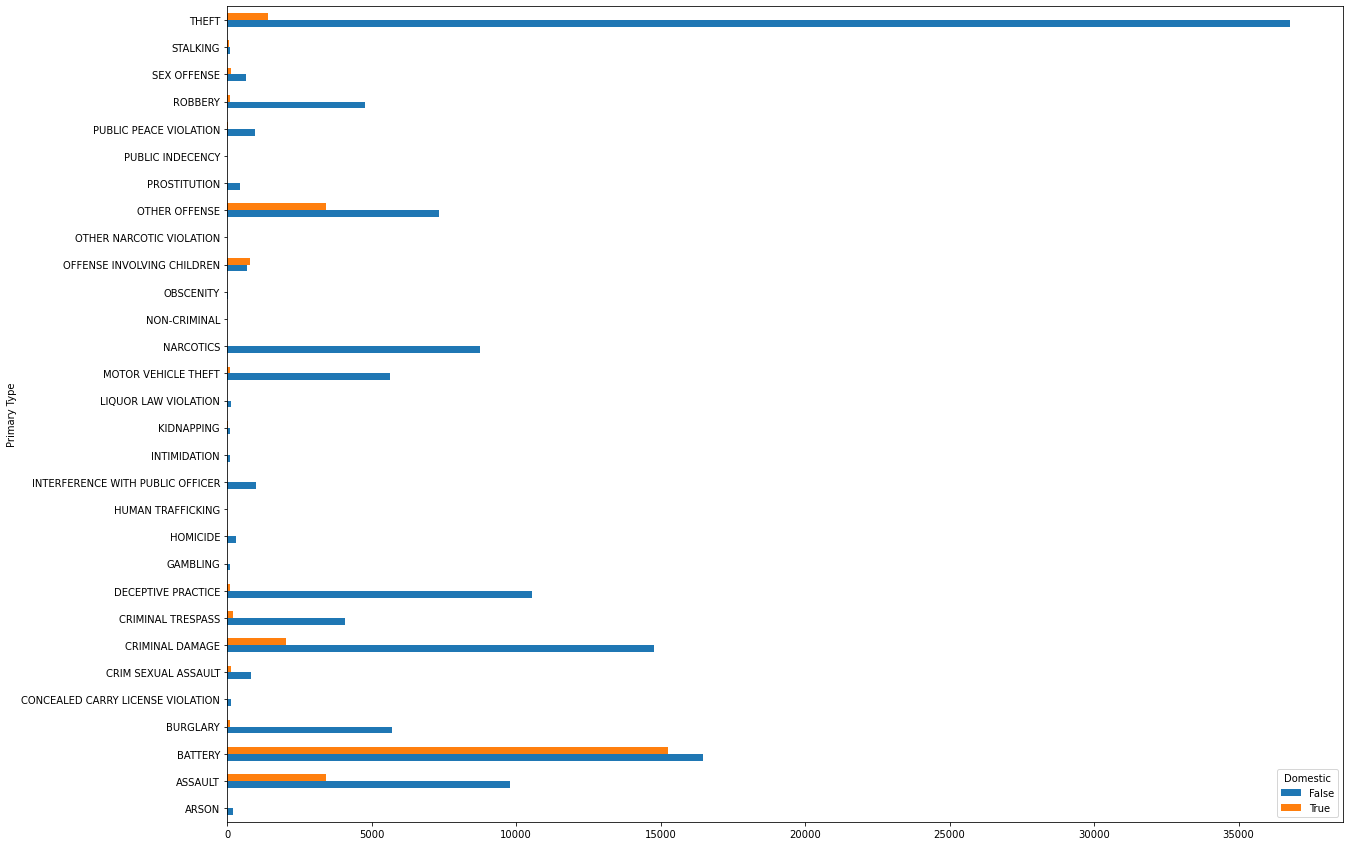

In [102]:
crime_data.groupby(['Primary Type','Domestic']).size().unstack('Domestic')[:30].plot.barh(figsize=(20,15))